# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [81]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('ggplot')
from scipy import stats

In [46]:
data = pd.io.stata.read_stata('us_job_market_discrimination.dta')
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [61]:
data.call.head(-1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
4839    0.0
4840    0.0
4841    0.0
4842    0.0
4843    1.0
4844    0.0
4845    0.0
4846    1.0
4847    1.0
4848    1.0
4849    0.0
4850    0.0
4851    0.0
4852    0.0
4853    0.0
4854    0.0
4855    0.0
4856    0.0
4857    0.0
4858    0.0
4859    1.0
4860    0.0
4861    1.0
4862    0.0
4863    0.0
4864    0.0
4865    0.0
4866    0.0
4867    0.0
4868    0.0
Name: call, Length: 4869, dtype: float32

### Task 1: What test is appropriate for this problem? Does CLT apply?

Our goal is to establish whether race has a significant impact on the rate of callbacks for resumes. The data show callback is an indicator variable with a binary response (0 or 1) where the value of '1' designates a resume that received a callback. While this specific variable would have a binomial distribution, through repeated sampling the Central Limit Theorem allows us to work with approximately normal distributions of the average callback rate for each of the black and white populations (since the dataset is sufficiently large (n >30)).

Since race was chosen randomly, we can reasonably assume independence, each sample includes at least 10 successes or failures (1 or 0), and each population is at least 20 times as big as our samples, we meet the conditions for a two-proportion Z test.

### Task 2: What are the null and alternate hypotheses?

*Null Hypothesis*: There is no difference in the callback rates between black and white people (P1 - P2 = 0)


*Alternative Hypothesis*: There is a difference (P1 - P2 ≠ 0)

### Task 3: Compute margin of error, confidence interval, and p-value. 

In [116]:
from statsmodels.stats.proportion import proportions_ztest

white_callbacks = sum(data[data['race'] == 'w'].call)
black_callbacks = sum(data[data['race'] == 'b'].call)
n1 = len(data[data['race'] == 'w']) # white sample size
n2 = len(data[data['race'] == 'b']) # black sample size
p1 = white_callbacks/n1 # white callback rate
p2 = black_callbacks/n2 # black callback rate
n = n1 + n2

# Estimated sigma (Margin of error)
estm_sigma = np.sqrt(((p2*(1-p2)/n2) + (p1*(1-p1)/n1)))
error = estm_sigma*crt_value

propt_diff =  p1-p2 

# Confidence intervals
low_mrgerror = propt_diff - (error)
high_mrgerror = propt_diff + (error)
print('Margin or Error =', error)
print('CI:', low_mrgerror, high_mrgerror)

# z_statistic and p-value
stat, pval = proportions_ztest((white_callbacks, black_callbacks), (n1, n2))

#critical value at 95% confidence
crt_value = stats.norm.ppf(1-(0.05/2))
print('p-value =', pval)

Margin or Error = 0.01525512602821483
CI: 0.016777728181230755 0.04728798023766041
p-value = 3.983886837585077e-05


### Task 4: Write a story describing the statistical significance in the context of the original problem.

Racial discrimination continues to play an unfortunately large role in the modern American labor market. In an effort to gauge the disparity between prospective white and black job applicants, two researchers sent nearly 5000 resumes in response to over 1300 job openings in the Boston and Chicago areas (the two areas the researchers each resided). Each resume was randomly assigned a 'white-' or 'black-sounding' name and the number of callbacks for each race was recorded. Of the 2435 resumes with a white-sounding name, 235 received callbacks. Of the 2435 resumes with a black-sounding name, 157 received callbacks. Testing for the chance we might normally observe a gap of this extremity yields a very low value that leads us to conclude that racial discrimination between white- and black-sounding names still exists.

### Question 5: Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The prior analysis only revealed evidence that race plays a role in callback success, nothing more. To determine the most important factors in callback success overall, we should first proceed by exploring which features are most highly correlated with callbacks.

In [117]:
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(kind='quicksort')
print(so['call'][-10:])

offsupport          0.047783
linc                0.049649
lmedhhinc_empzip    0.049879
fracdropout         0.056671
yearsexp            0.061436
adid                0.063178
empholes            0.071888
honors              0.071951
specialskills       0.111074
call                1.000000
dtype: float64


It doesn't appear that race is the only factor in callbacks as factors like 'special skills', 'honors', employment holes and years of experience also played a part. Let's take years of experience as an example.

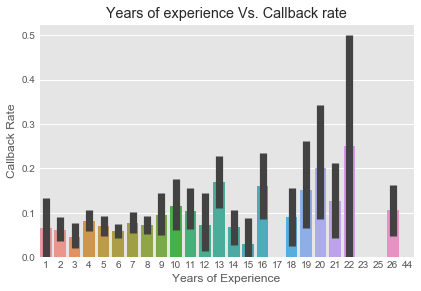

In [118]:
sns.barplot(x='yearsexp', y='call', data=data)
plt.title('Years of experience Vs. Callback rate')
plt.ylabel('Callback Rate')
plt.xlabel('Years of Experience')
plt.show()

There indeed appears to be a relatively strong and positive correlation between callback success and years of experience. 

Overall, we certainly have evidence that the perception of black- and white-sounding names played a role in callback success in this study, but there are clearly other variables to explore. We could apply more advanced feature selection processes to further determine which variables are most important.